In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
dirl ="C:/Users/pagmas.saint/Downloads/lab2 Topic_Survey_Assignment.csv"
df = pd.read_csv(dirl)
print(df.columns)
df.columns = df.columns.str.strip()
print(df.head())

Index(['Unnamed: 0', 'Very interested', 'Somewhat interested',
       'Not interested'],
      dtype='object')
                   Unnamed: 0  Very interested  Somewhat interested  \
0   Big Data (Spark / Hadoop)             1332                  729   
1  Data Analysis / Statistics             1688                  444   
2             Data Journalism              429                 1081   
3          Data Visualization             1340                  734   
4               Deep Learning             1263                  770   

   Not interested  
0             127  
1              60  
2             610  
3             102  
4             136  


In [27]:
df['Very interested'] = pd.to_numeric(df['Very interested'], errors='coerce')
df['Somewhat interested'] = pd.to_numeric(df['Somewhat interested'], errors='coerce')
df['Not interested'] = pd.to_numeric(df['Not interested'], errors='coerce')

total_responses = df[['Very interested', 'Somewhat interested', 'Not interested']].sum(axis=1)
df['Very interested %'] = df['Very interested'] / total_responses * 100
df['Somewhat interested %'] = df['Somewhat interested'] / total_responses * 100
df['Not interested %'] = df['Not interested'] / total_responses * 100

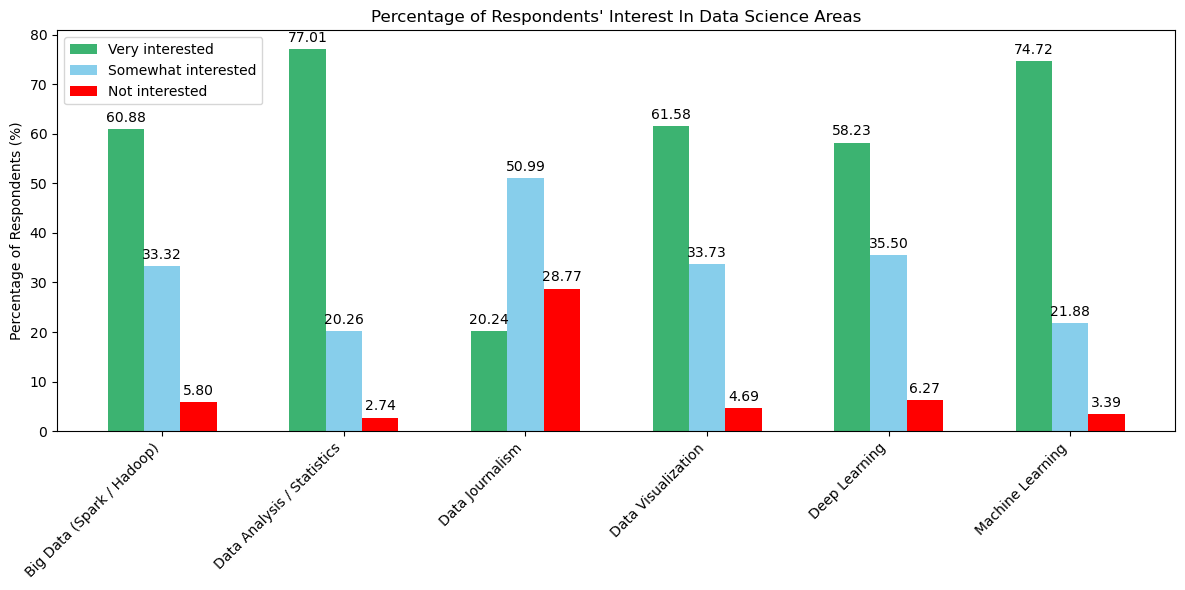

In [33]:
labels = df['Unnamed: 0']  
very_interested = df['Very interested %']
somewhat_interested = df['Somewhat interested %']
not_interested = df['Not interested %']

x = np.arange(len(labels)) 
width = 0.2  
fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - width, very_interested, width, label='Very interested', color='mediumseagreen')
rects2 = ax.bar(x, somewhat_interested, width, label='Somewhat interested', color='skyblue')
rects3 = ax.bar(x + width, not_interested, width, label='Not interested', color='red')

ax.set_xlabel('')
ax.set_ylabel('Percentage of Respondents (%)')
ax.set_title("Percentage of Respondents' Interest In Data Science Areas")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
plt.tight_layout()
plt.show()